# De oorzaak van luchtvervuiling: transport vs industrie

Studenten: Melvin Dalhuisen, Ceylan Mas, Froukje Dijk, Isa van de Hoef

Team: E1

In [9]:
# Load image from link
url = 'image1.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© iStock"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© iStock


## Introductie

Luchtvervuiling is een van de grootste milieuproblemen van onze tijd en heeft al decennia lang de aandacht van wetenschappers, beleidsmakers en burgers. Hoewel luchtvervuiling in veel landen gereguleerd wordt door strenge milieuwetten, blijft het een hardnekkig probleem met verregaande gevolgen voor zowel het milieu als de volksgezondheid. Twee van de belangrijkste bronnen van luchtvervuiling zijn de industrie en het transport en verkeer.

Vanuit het perspectief van de industrie speelt de productie van goederen een cruciale rol in de uitstoot van schadelijke stoffen zoals kooldioxide, zwaveldioxide en fijnstof. Deze vervuilende stoffen worden uitgestoten door fabrieken, energiecentrales en andere industriële installaties en dragen bij aan smog, verzuring van ecosystemen en klimaatverandering.

Aan de andere kant veroorzaakt transport en verkeer een aanzienlijke hoeveelheid luchtvervuiling door de uitstoot van uitlaatgassen. Auto’s, vrachtwagens, bussen en andere vervoermiddelen zijn verantwoordelijk voor een groot deel van de stikstofoxiden en fijnstof in de atmosfeer.

In deze data story gaan we aan de hand van verschillende dataset verschillende perspectieven op dit probleem beargumenteren. De datasets zijn afkomstig van verschillende bronnen en zijn in sommige gevallen met elkaar samengevoegd.

## Dataset en Voorverwerking

We hebben bij veel datasets verschillende stappen genomen om deze te kunnen gebruiken in onze data analyse. Bij de dataset van hoeveelheden luchtvervuiling hebben we bijvoorbeeld veel onnodige kolommen gedropped. Bovendien hebben we gesorteerd op het meest recente jaar uit deze dataset 2019.

Ook hebben we sommige kolomnamen gewijzigd om zo het samenvoegen van de datasets makkelijker te maken. In alle gevallen hebben we de datasets samengevoegd om het land van de bijbehorende data. Echter had deze kolom niet in alle datasets dezelfde naam. We hebben ervoor gekozen om deze kolom 'Location' te noemen en hebben waar nodig dus kolomnamen gewijzigd naar 'Location'.

# Variabele omschijvingen.

Hieronder volgt een lijst met de variabelen uit de dataset met luchtvervuiling per land:
- ParentLocationCode: Discrete / Nominal
- ParentLocation: Discrete / Nominal
- SpatialDimValueCode: Discrete / Nominal
- Location: Discrete / Nominal
- Period: Discrete / Interval
- Dim1: Discrete / Ratio
- FactValueNumeric: Discrete / Ratio
- FactValueNumericLow: Discrete / Ratio
- FactValueNumericHigh: Discrete / Ratio
- Value: Discrete / Ratio


## Perspectief Industrieel

Industrie speelt een cruciale rol in de economie van een land, maar het is ook een van de grootste bronnen van luchtvervuiling. Industriële activiteiten zoals productie en energieopwekking leiden tot de uitstoot van schadelijke stoffen zoals kooldioxide (CO2), zwaveldioxide (SO2), stikstofoxiden (NOx), en fijnstof. Deze stoffen veroorzaken ernstige milieuproblemen zoals klimaatverandering, verzuring en smog.

In veel landen, zoals China, heeft de snelle industriële groei geleid tot ernstige luchtvervuiling. Ondanks strenge emissienormen en maatregelen zoals het sluiten van vervuilende fabrieken, blijft naleving en handhaving een uitdaging. Industriële faciliteiten bevinden zich vaak in stedelijke gebieden of nabij kwetsbare ecosystemen, waardoor de impact van luchtvervuiling nog groter is.

### Argument 1 Industrieel

Hieronder hebben we een wereldkaart gemaakt met de luchtvervuiling per land op de wereld. Hoe donkerder de kleur, hoe meer fijnstof er in de lucht zit. De waardes worden weergegeven in de concentratie PM2.5. Dit is de concentratie kleine deeltjes in de lucht, ook wel fijnstof genoemd. Donkergroene kleuren bevatten dus meer fijnstof in de lucht en zijn dus gebieden met een viezere lucht.

/var/folders/n7/_tt8smy1091crcgdfk5zp5v40000gn/T/ipykernel_53419/323009568.py:30: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


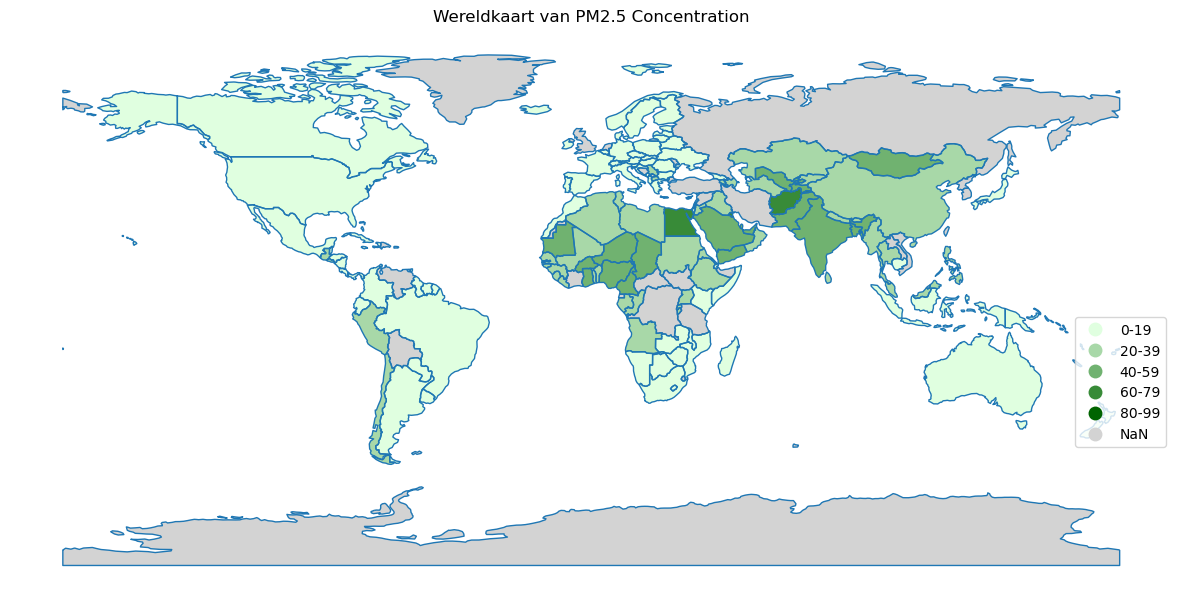

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Lees het CSV-bestand
data = pd.read_csv('data.csv')

# Verwijder de kolommen die niet boeien
columns_to_drop = [
    'IsLatestYear', 'ValueType', 'Indicator', 'Location type', 'Dim1 type', 
    'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3ValueCode', 
    'Dim3 type', 'Dim3', 'DataSourceDimValueCode', 'DataSource', 
    'FactValueNumericPrefix', 'FactValueUoM', 'FactValueNumericLowPrefix', 
    'FactValueNumericHighPrefix', 'FactValueTranslationID', 'FactComments', 
    'Language', 'DateModified', 'IndicatorCode', 'Period type'
]

data = data.drop(columns=columns_to_drop)

# Filter de data
data = data[(data['Period'] == 2019) & (data['Dim1'] == 'Total')]

# Maak een nieuwe kolom voor de groepen met stappen van 20
bins = list(range(0, 101, 20))
labels = [f'{i}-{i+19}' for i in bins[:-1]]
data['Group'] = pd.cut(data['FactValueNumeric'], bins=bins, labels=labels, right=False)

# Lees de wereldkaart shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge de data met de wereldkaart
world = world.merge(data, how='left', left_on='name', right_on='Location')

# Definieer een colormap met grotere kleurverschillen
cmap = mcolors.LinearSegmentedColormap.from_list('green_scale', ['#e0ffe0', '#006400'], N=len(labels))

# Plot de kaart
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Group', ax=ax, legend=True, cmap=cmap,
           missing_kwds={"color": "lightgrey"})

# Verwijder de x- en y-assen
ax.set_axis_off()

# Legenda toevoegen
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 0.5))
plt.title('Wereldkaart van PM2.5 Concentration')
plt.show()

> *Figure 1: Luchtvervuiling van alle landen op de wereld.*

Hieronder staat een lijngrafiek. Deze grafiek laat zien dat bij de aanwezigheid van meer industrie, er meer fijnstof in de lucht komt. De punten rechstboven in de grafiek tonen dit vooral aan.

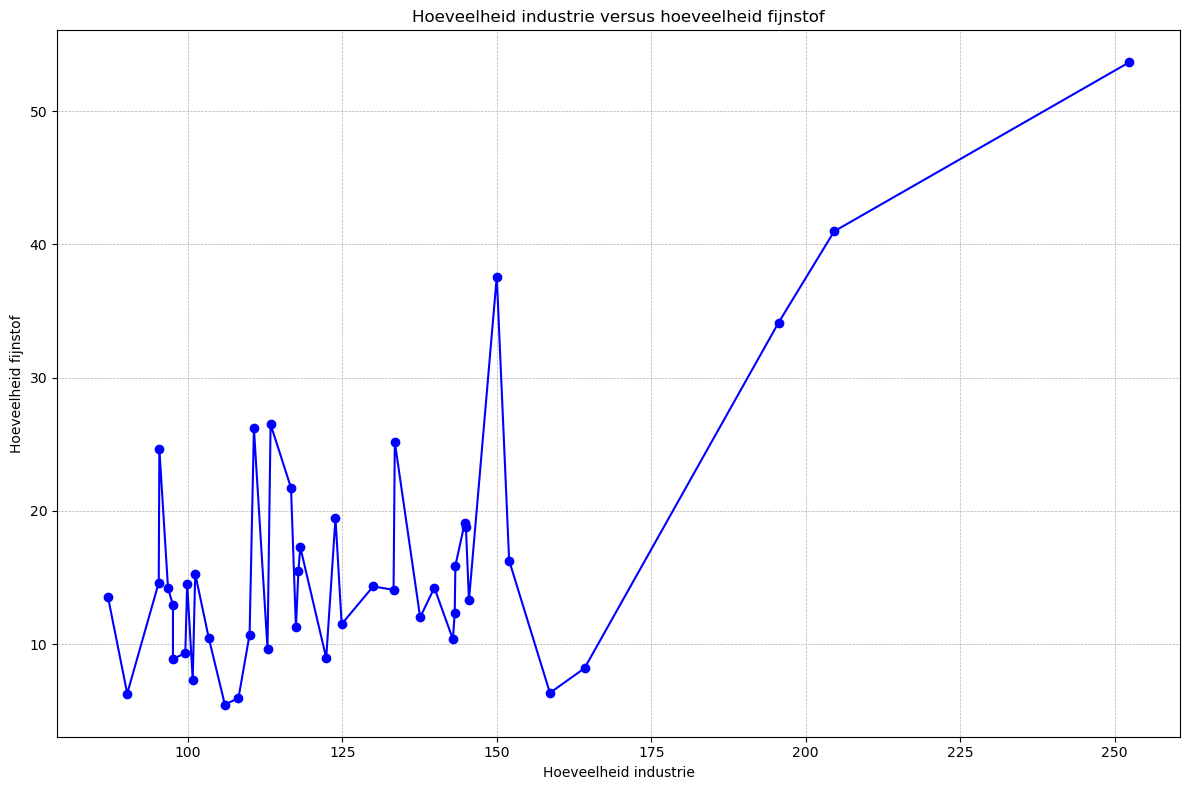

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Lees de gegevens uit het CSV-bestand
df = pd.read_csv('merged_file.csv')

# Hernoem kolommen indien nodig
df.rename(columns={'Value_x': 'Value', 'Value_y': 'Industry_Value'}, inplace=True)

# Sorteer de DataFrame op Industry_Value
df = df.sort_values(by='Industry_Value')

# Plot de grafiek
plt.figure(figsize=(12, 8))
plt.plot(df['Industry_Value'], df['FactValueNumeric'], marker='o', linestyle='-', color='b')

# Labels en titel toevoegen
plt.xlabel('Hoeveelheid industrie')
plt.ylabel('Hoeveelheid fijnstof')
plt.title('Hoeveelheid industrie versus hoeveelheid fijnstof')

# Voeg een grid toe
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Toon de grafiek
plt.tight_layout()
plt.show()


> *Figure 2: Lijngrafiek van luchtvervuiling versus industrie.*

in de grafiek zie je dat bij een grotere hoeveelheid industrie, er meer fijnstof in de lucht zit. Vooral extreem hoge industriewaardes geven hoge hoeveelheden fijnstof in de lucht. Dit toont dus aan dat de industrie een groot aandeel heeft in de luchtvervuiling

### Argument 2 Industrieel

De grafiek hieronder toont de totale export- en importwaarden per continent voor 2019, samen met de gemiddelde luchtverontreinigingswaarden, en suggereert een verband tussen handelsactiviteiten en luchtverontreiniging. Azië heeft de hoogste handels- en vervuilingswaarden, terwijl Europa en Noord-Amerika, ondanks hoge handelsactiviteiten, gematigde vervuilingswaarden hebben door strengere milieuregels. Afrika, Oceanië en Zuid-Amerika hebben lagere handels- en vervuilingsniveaus, waarschijnlijk door minder economische activiteiten. Dit benadrukt de noodzaak van milieureguleringen en schone technologieën om de impact van economische groei op de luchtkwaliteit te beperken.

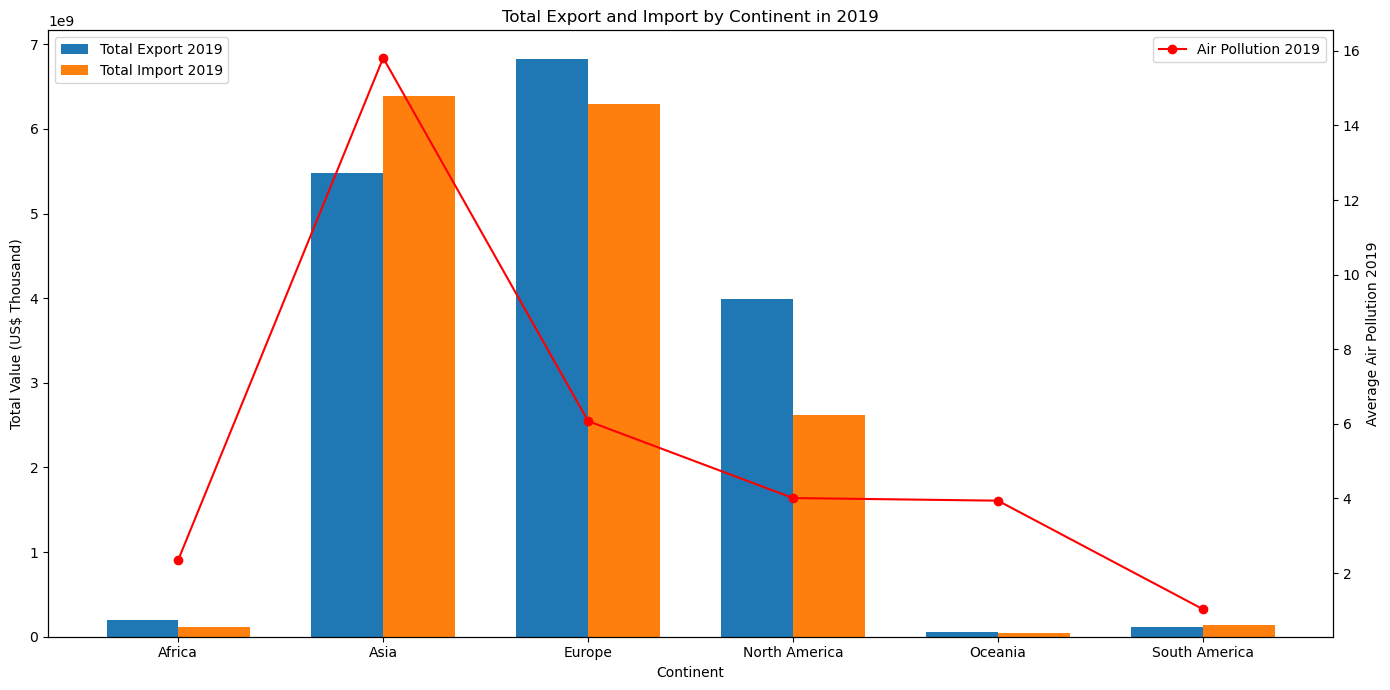

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad de import/export dataset
file_path_trade = '34_years_world_export_import_dataset.csv'
data_trade = pd.read_csv(file_path_trade)

# Filter de dataset voor het jaar 2019
data_trade_2019 = data_trade[data_trade['Year'] == 2019]

# Bereken de totale import en export per land in 2019
total_summary_2019 = data_trade_2019.groupby('Partner Name').agg(
    total_export_2019=('Export (US$ Thousand)', 'sum'),
    total_import_2019=('Import (US$ Thousand)', 'sum')
).reset_index()

# Laad de luchtverontreiniging dataset
file_path_pollution = 'air_pollution new.csv'
data_pollution = pd.read_csv(file_path_pollution)

# Kolomnamen opschonen en de '2019' kolom naar numeriek converteren
data_pollution.columns = data_pollution.columns.str.replace('"', '').str.strip()
data_pollution['2019'] = pd.to_numeric(data_pollution['2019'], errors='coerce')

# Continent mapping
continent_data_updated = {
    'Africa': ['Algeria', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Chad', 'Comoros', 'Congo', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Togo', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Uruguay', 'Venezuela']
}

# Create a mapping from country to continent
country_to_continent_updated = {country: continent for continent, countries in continent_data_updated.items() for country in countries}

# Voeg de continent informatie toe aan de import/export dataset
total_summary_2019['Continent'] = total_summary_2019['Partner Name'].map(country_to_continent_updated)

# Bereken de totale import en export per continent in 2019
continent_summary_2019 = total_summary_2019.groupby('Continent').agg(
    total_export_2019=('total_export_2019', 'sum'),
    total_import_2019=('total_import_2019', 'sum')
).reset_index()

# Voeg de continent informatie toe aan de luchtverontreiniging dataset
data_pollution['Continent'] = data_pollution['country'].map(country_to_continent_updated)

# Bereken de gemiddelde luchtverontreiniging per continent voor 2019
average_2019_per_continent = data_pollution.groupby('Continent')['2019'].mean().reset_index()

# Merge de luchtverontreiniging gegevens met de handel gegevens
data_merged = continent_summary_2019.merge(average_2019_per_continent, on='Continent')

# Plot de resultaten
fig, ax1 = plt.subplots(figsize=(14, 7))

bar_width = 0.35
index = range(len(data_merged))

bar1 = ax1.bar(index, data_merged['total_export_2019'], bar_width, label='Total Export 2019')
bar2 = ax1.bar([i + bar_width for i in index], data_merged['total_import_2019'], bar_width, label='Total Import 2019')

ax1.set_xlabel('Continent')
ax1.set_ylabel('Total Value (US$ Thousand)')
ax1.set_title('Total Export and Import by Continent in 2019')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(data_merged['Continent'])
ax1.legend(loc='upper left')

# Secondary axis for air pollution
ax2 = ax1.twinx()
ax2.plot([i + bar_width / 2 for i in index], data_merged['2019'], color='red', marker='o', label='Air Pollution 2019')
ax2.set_ylabel('Average Air Pollution 2019')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> *Figure 3: Totale export en import, vergeleken met de average air poluttion per continent

Conclusie die je kan trekken uit de grafiek hierboven en hoe dit het perspectief bewijst.

## Perspectief Transport

Luchtvervuiling is een complex probleem met meerdere bronnen, en naast de industrie speelt ook transport en verkeer een grote rol. Voertuigen zoals auto's, vrachtwagens en bussen stoten grote hoeveelheden schadelijke stoffen uit, waaronder koolstofmonoxide (CO), stikstofoxiden (NOx), en fijnstof. Deze emissies dragen bij aan smogvorming en klimaatverandering, vooral in stedelijke gebieden waar het verkeer het drukst is.

In veel landen is transport een van de belangrijkste oorzaken van luchtvervuiling. De groei van steden en de toename van het aantal voertuigen hebben geleid tot hogere niveaus van vervuilende stoffen in de lucht. Stadscentra en drukke verkeersknooppunten worden vaak geconfronteerd met ernstige luchtvervuiling, wat resulteert in een verminderde luchtkwaliteit en zichtbaarheid.



### Argument 1 Transport

Op deze wereldkaart zie je per land de "Air Quality Value". Deze waarde is gebaseerd op de hoeveelheid PM2.5 en CO in de lucht, maar ook de hoeveelheid Ozone gas. Des te lager de AQI waarde, des te beter en gezonder.

/var/folders/n7/_tt8smy1091crcgdfk5zp5v40000gn/T/ipykernel_53419/3207920118.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


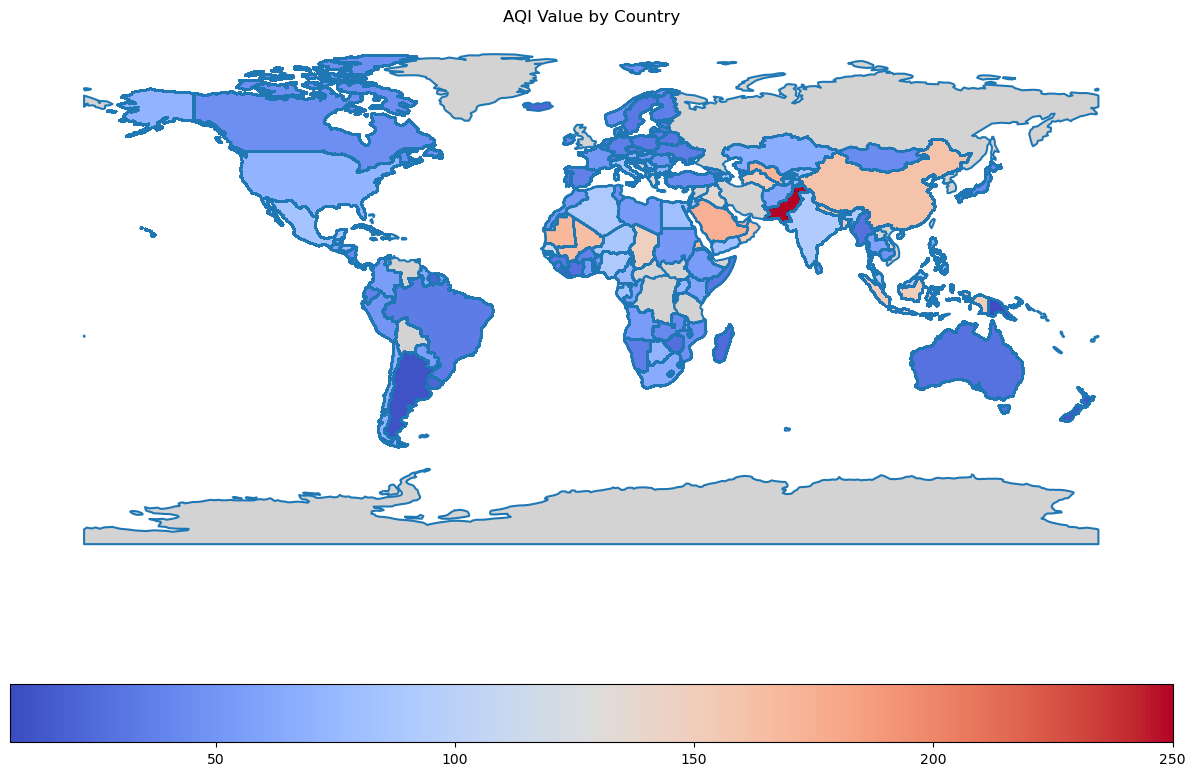

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Laad de dataset
file_path = r'AQI and Lat Long of Countries.csv'
data = pd.read_csv(file_path)

# Laad de wereldkaart
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge de wereldkaart met de AQI dataset
world = world.merge(data, how='left', left_on='name', right_on='Country')

# Definieer de limieten voor de kleurenbalk
vmin = data['AQI Value'].min()
vmax = data['AQI Value'].max() / 2  # Aangepaste schaal om de verschillen duidelijker te maken

# Plot de wereldkaart met AQI waarden
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='AQI Value', ax=ax, legend=True,
           legend_kwds={'label': "",
                        'orientation': "horizontal"},
           cmap='coolwarm', vmin=vmin, vmax=vmax,
           missing_kwds={"color": "lightgrey"})

# Verwijder de assen
ax.set_axis_off()

plt.title('AQI Value by Country')
plt.show()

> *Figure 4: uitleg/zin????*

Conclusie / wat kun je halen uit de bovenstaande grafiek

### Argument 2 Transport

In de onderstaande grafiek zie je de hoeveelheid verkeer (de Traffic Index) uitgezet tegenover de hoeveelheid CO2 (CO2 Emission Index). De grafiek bevat de data van 84 landen, wat betekend dat elk punt in de plot een land is waarvan je op de y-as de hoeveelheid verkeer kunt zien, en op de x-as de CO2 uitstoot hiervan.

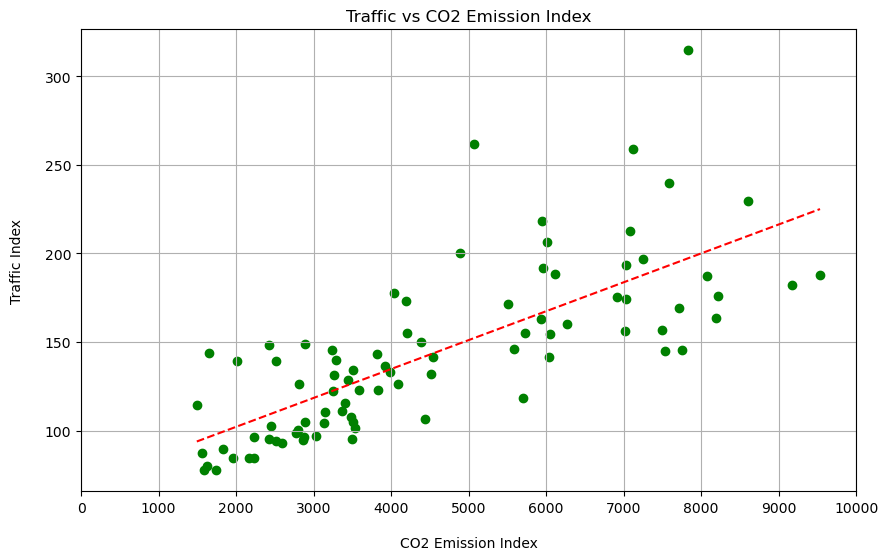

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Adjusted_TransportCO2.csv')

# Sort the dataframe by CO2 Emission Index
sorted_df = df.sort_values(by='CO2 Emission Index')

# Create a scatter plot with axis labels close to the axes and green data points
plt.figure(figsize=(10, 6))
plt.scatter(sorted_df['CO2 Emission Index'], sorted_df['Traffic Index'], color='green')

# Fit a linear trend line
z = np.polyfit(sorted_df['CO2 Emission Index'], sorted_df['Traffic Index'], 1)
p = np.poly1d(z)
plt.plot(sorted_df['CO2 Emission Index'], p(sorted_df['CO2 Emission Index']), "r--")

# Set the labels and title
plt.xlabel('CO2 Emission Index', labelpad=15)
plt.ylabel('Traffic Index', labelpad=15)
plt.title('Traffic vs CO2 Emission Index')

# Customize the x-axis labels and ensure it starts at 0
plt.xticks(ticks=range(0, int(sorted_df['CO2 Emission Index'].max()) + 1000, 1000))
plt.xlim(left=0)  # Ensure the x-axis starts at 0

# Show the plot
plt.grid(True)
plt.show()




> *Figure 5: Hoeveelheid verkeer versus de CO2 uitstoot.*

Je kunt in de bovenstaande grafiek zien dat bij een grotere hoeveelheid verkeer in een land, er meer CO2 emissie is. De trendlijn in de plot laat dit duidelijk zien. Dit laat dus zien dat het verkeer in een land een groot aandeel heeft in de hoeveelheid luchtvervuiling.

### Argument 3 Transport

In de onderstaande grafiek zie je de de stijging van de gemiddelde co2 emissie per jaar wereldwijd. Als je de grafiek afleest is te zien dat de CO2-emissie in de laatste tientallen jaren enorm gestegen is. Dit bevestigt dus het perspectief dat transport voor enorm veel luchtvervuiling zorgt en dat dit alsmaar toeneemt.

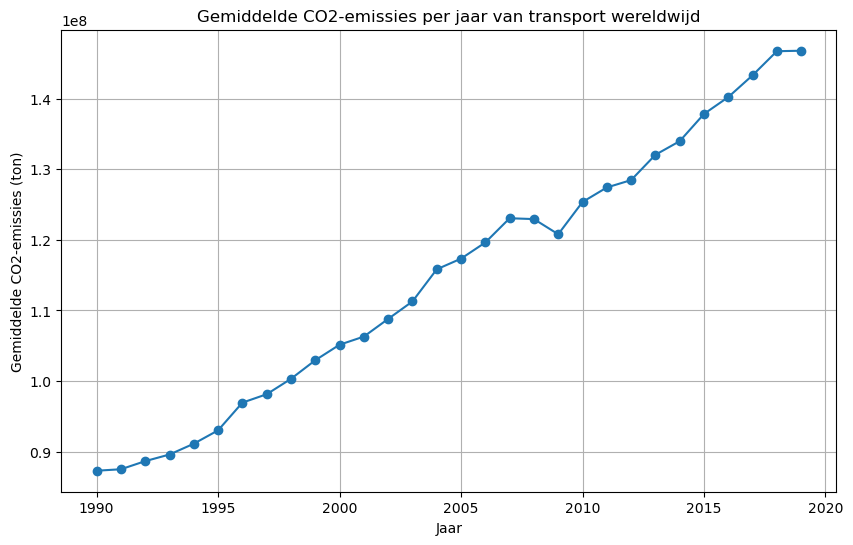

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('co2-emissions-transport.csv')

import matplotlib.pyplot as plt

# Remove the 'Code' column
data = data.drop(columns=['Code'])

# Group by 'Year' and calculate the mean of 'Carbon dioxide emissions from transport', ignoring NaNs
yearly_avg_emissions = data.groupby('Year')['Carbon dioxide emissions from transport'].mean()

# Reset the index for plotting
yearly_avg_emissions = yearly_avg_emissions.reset_index()

# Filter out the year 2020
yearly_avg_emissions_filtered = yearly_avg_emissions[yearly_avg_emissions['Year'] < 2020]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_emissions_filtered['Year'], yearly_avg_emissions_filtered['Carbon dioxide emissions from transport'], marker='o')
plt.title('Gemiddelde CO2-emissies per jaar van transport wereldwijd')
plt.xlabel('Jaar')
plt.ylabel('Gemiddelde CO2-emissies (ton)')
plt.grid(True)
plt.show()



> *Figuur 6: Op de grafiek is de gemiddelde CO2-emissie te zien wereldwijd. Op de X-as staan de jaren en op de Y-as de hoeveelheid CO2-emissie*

## Reflectie

hoeft niet voor draft

## Werkverdeling

hoeft niet voor draft

## Referenties

hoeft niet voor draft